In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,silhouette_samples

In [ ]:
crime_df=pd.read_csv("https://raw.githubusercontent.com/Prayagv15/K-Means-Clustering/main/crime_data.csv")

In [ ]:
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
# We will scale our data

scaler=StandardScaler()
scaled_crime_df=scaler.fit_transform(crime_df.iloc[:,1:])

In [ ]:
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
X=scaled_crime_df

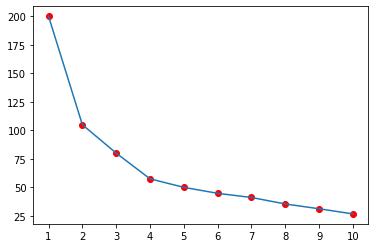

In [ ]:
# Plotting the Elbow-Graph

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,color='r')
plt.xticks(range(1,11))
plt.show()

In [ ]:
# Now for Number Of Clusters=5, we see to which all clusters they fit in.

clustered=KMeans(n_clusters=5,init='k-means++',random_state=10)
clustered.fit(X)

KMeans(n_clusters=5, random_state=10)

In [ ]:
clustered.labels_

array([0, 2, 2, 1, 2, 2, 4, 1, 2, 0, 4, 3, 2, 1, 3, 1, 1, 0, 3, 2, 4, 2,
       3, 0, 1, 3, 1, 2, 3, 4, 2, 2, 0, 3, 1, 1, 1, 1, 4, 0, 3, 0, 2, 4,
       3, 1, 1, 3, 3, 1], dtype=int32)

In [ ]:
clustered.cluster_centers_

array([[ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.22748551, -0.30098674, -0.01276108, -0.10667779],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-1.11467476, -1.17725513, -1.00201665, -1.05938813],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482]])

In [ ]:
crime_df['Clusters_ID']=clustered.labels_

In [ ]:
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters_ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [ ]:
crime_df.shape

(50, 6)

In [ ]:
crime_df.groupby('Clusters_ID').agg(['mean']).reset_index()

,Clusters_ID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.671429,251.285714,54.285714,21.685714
1,1,6.807143,145.928571,65.357143,20.242857
2,2,10.966667,264.000000,76.500000,33.608333
3,3,2.981818,73.636364,51.181818,11.409091
4,4,4.500000,126.333333,83.500000,16.266667


In [ ]:
for i in np.array([0,1,2,3,4]):
  print('Cities that belong to Cluster Index',i)
  print(crime_df[crime_df['Clusters_ID']==i])
  print('\n')

Cities that belong to Cluster Index 0
        Unnamed: 0  Murder  Assault  UrbanPop  Rape  Clusters_ID
0          Alabama    13.2      236        58  21.2            0
9          Georgia    17.4      211        60  25.8            0
17       Louisiana    15.4      249        66  22.2            0
23     Mississippi    16.1      259        44  17.1            0
32  North Carolina    13.0      337        45  16.1            0
39  South Carolina    14.4      279        48  22.5            0
41       Tennessee    13.2      188        59  26.9            0


Cities that belong to Cluster Index 1
      Unnamed: 0  Murder  Assault  UrbanPop  Rape  Clusters_ID
3       Arkansas     8.8      190        50  19.5            1
7       Delaware     5.9      238        72  15.8            1
13       Indiana     7.2      113        65  21.0            1
15        Kansas     6.0      115        66  18.0            1
16      Kentucky     9.7      109        52  16.3            1
24      Missouri     9.0

In [ ]:
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters_ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [ ]:
# We are now dropping the Column Clusters_ID for further examiantion.

crime_df=crime_df.drop(['Clusters_ID'],axis=1)

In [ ]:
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
# Now let us consider the range of clusters.

range_n_clusters=[3,4,5,6]

## **Features are *Urban Population* and *Assault*.**

For n_clusters= 3 The average Silhouette_score is : 0.30813622648945616
For n_clusters= 4 The average Silhouette_score is : 0.33968891433344395
For n_clusters= 5 The average Silhouette_score is : 0.3133544326927289
For n_clusters= 6 The average Silhouette_score is : 0.29675212802432493


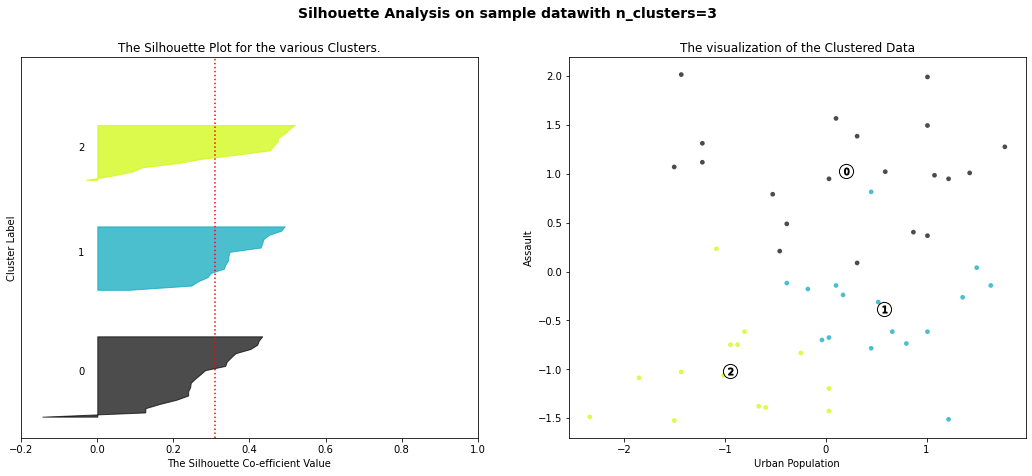

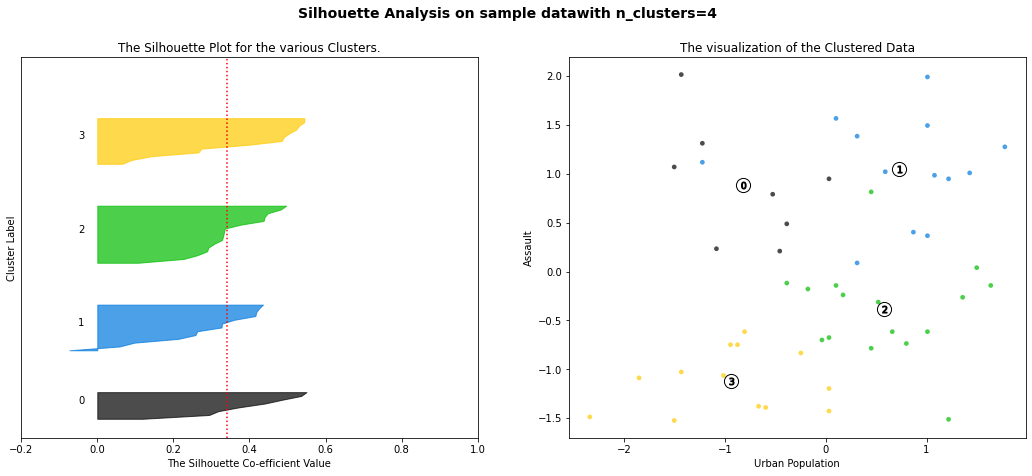

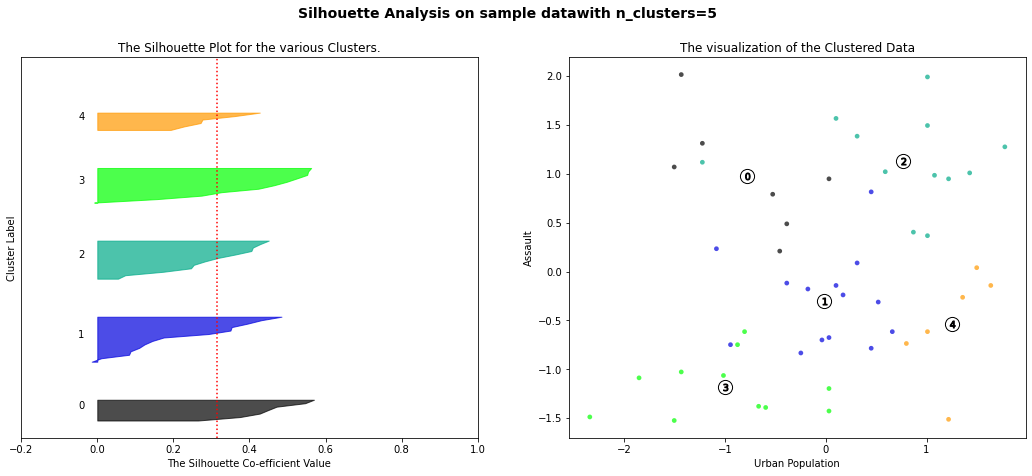

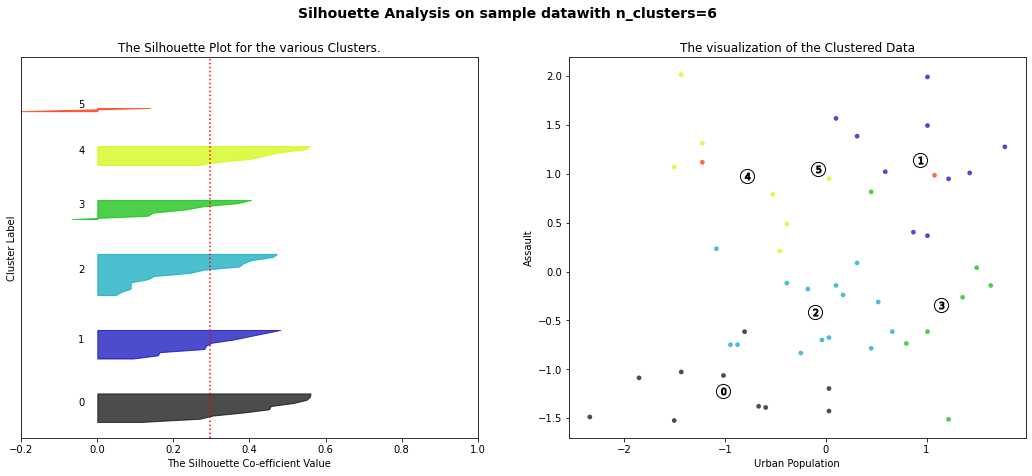

In [ ]:
# Now plotting the Silhouette Score along with the clusters
# Now Plotting the Silhouette score along with clusters for Different Columns/Features.

for n_clusters in range_n_clusters:
  fig,(ax1,ax2)=plt.subplots(1,2) # Creating a subplot with 1 row and 2 columns
  fig.set_size_inches(18,7)

  # The 1st Subplot is the Silhouette plot
  # The Silhouette co-efficient can range from -1 to +1.
  ax1.set_xlim([-0.1,1]) 
   
  # Here (n_clusters+1)*10 is for inserting blank space between Silhouette plots of individual Cluster, to demarcate them correctly. 
  ax1.set_ylim([0,len(X)+(n_clusters+1)*10])

  # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
  clustered=KMeans(n_clusters=n_clusters,random_state=10,init='k-means++')
  clustered_labels=clustered.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into density and separation of the formed clusters.
  silhouette_avg=silhouette_score(X,clustered_labels)
  print("For n_clusters=",n_clusters,"The average Silhouette_score is :",silhouette_avg)

  # Compute Silhouette score for each sample
  sample_silhouette_values=silhouette_samples(X,clustered_labels)

  y_lower=5
  
  for i in range(n_clusters):
    # 
    ith_cluster_silhouette_values= sample_silhouette_values[clustered_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i=ith_cluster_silhouette_values.shape[0]

    y_upper=y_lower+size_cluster_i

    color=cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)

    # Label Silhouette Plots with their cluster number at the middle
    ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))

    # Compute the new y_lower for the next plot.
    y_lower=y_upper+10  # 10 for the 0 samples.

  ax1.set_title("The Silhouette Plot for the various Clusters.")
  ax1.set_xlabel("The Silhouette Co-efficient Value")
  ax1.set_ylabel("Cluster Label")

  # The vertical  line for the average silhouette for all the values.
  ax1.axvline(x=silhouette_avg,color='red',linestyle=":")

  ax1.set_yticks([]) # Clear all the y-axis labels/ticks.
  ax1.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

  # 2nd plot showing the actual clusters formed.

  colors=cm.nipy_spectral(clustered_labels.astype(float)/n_clusters)
  ax2.scatter(X[:,2],X[:,1],marker='.',s=90,lw=0,alpha=0.7,color=colors,edgecolor='k') # Here Our Features/Columns are Urban Population and Assault

  # Labelling the clusters.
  centers=clustered.cluster_centers_
  
  # Draw a white circles at cluster center.
  ax2.scatter(centers[:,2],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')

  for i,c in enumerate(centers):
    ax2.scatter(c[2],c[1],marker='$%d$'%i,alpha=1,s=50,edgecolor='k')

  ax2.set_title("The visualization of the Clustered Data")
  ax2.set_xlabel("Urban Population")
  ax2.set_ylabel("Assault")
  
  plt.suptitle(("Silhouette Analysis on sample data" "with n_clusters=%d")% n_clusters,fontsize=14,fontweight='bold')
plt.show()

## **Features are *Urban Population* and *Rape*.**

For n_clusters= 3 The average Silhouette_score is : 0.30813622648945616
For n_clusters= 4 The average Silhouette_score is : 0.33968891433344395
For n_clusters= 5 The average Silhouette_score is : 0.3133544326927289
For n_clusters= 6 The average Silhouette_score is : 0.29675212802432493


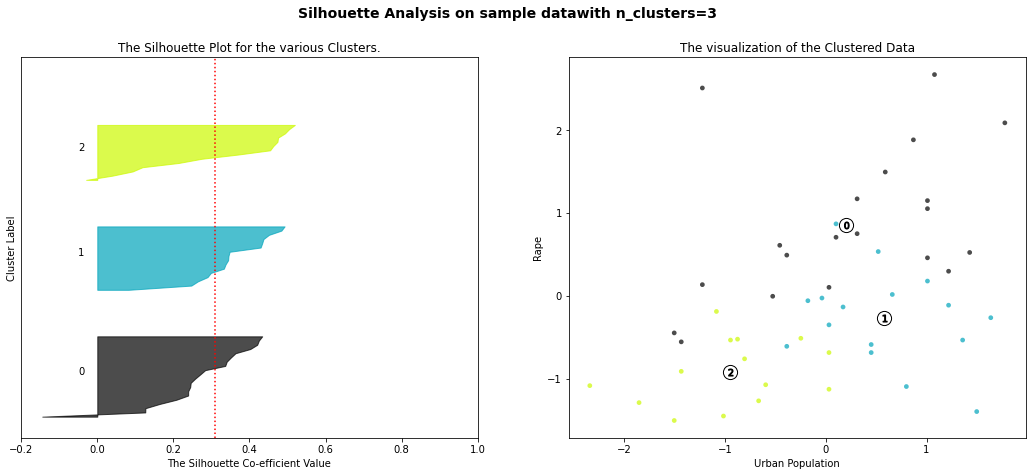

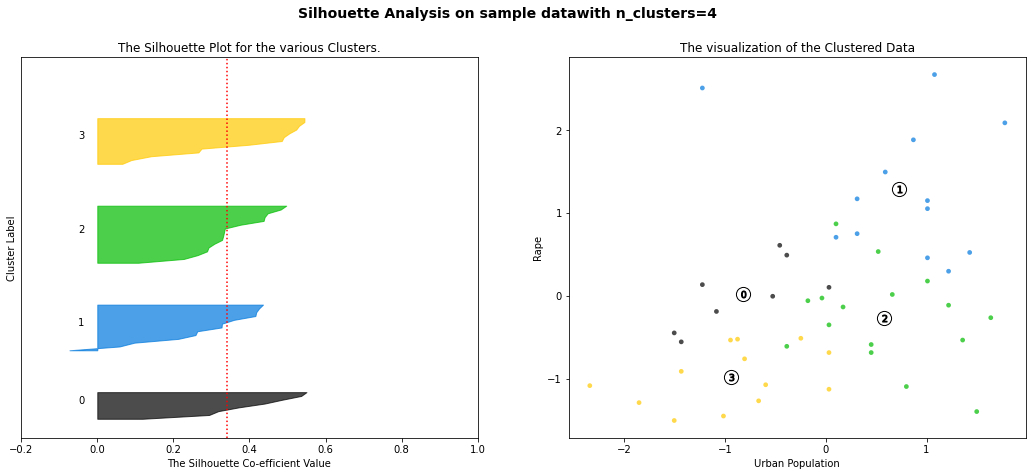

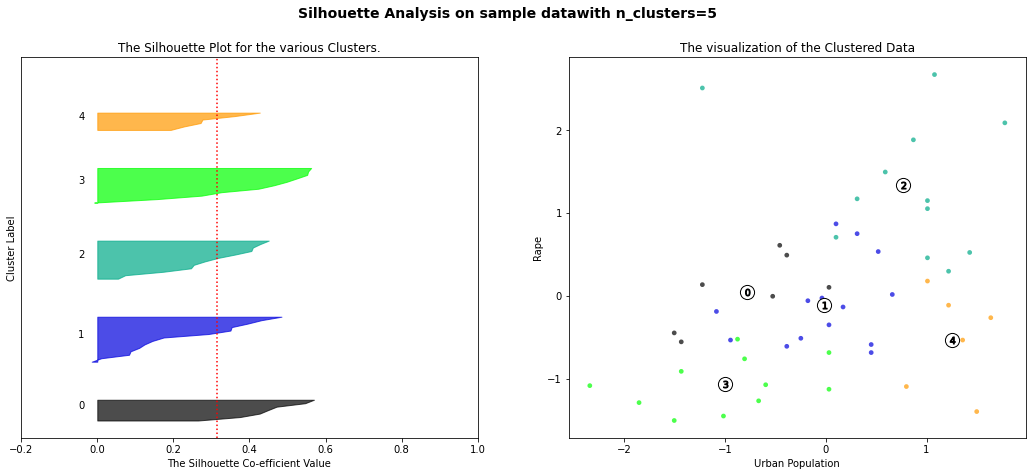

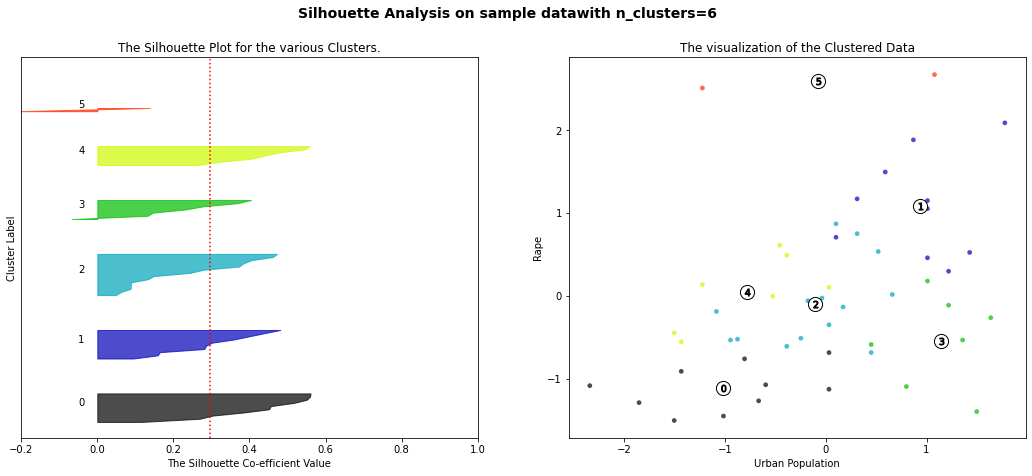

In [ ]:
for n_clusters in range_n_clusters:
  fig,(ax1,ax2)=plt.subplots(1,2)
  fig.set_size_inches(18,7)



  ax1.set_xlim([-0.1,1]) 
  ax1.set_ylim([0,len(X)+(n_clusters+1)*10])

  clustered=KMeans(n_clusters=n_clusters,random_state=10,init='k-means++')
  clustered_labels=clustered.fit_predict(X)

  silhouette_avg=silhouette_score(X,clustered_labels)
  print("For n_clusters=",n_clusters,"The average Silhouette_score is :",silhouette_avg)

  sample_silhouette_values=silhouette_samples(X,clustered_labels)

  y_lower=5
  
  for i in range(n_clusters):
    ith_cluster_silhouette_values=\
    sample_silhouette_values[clustered_labels==i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i=ith_cluster_silhouette_values.shape[0]
    y_upper=y_lower+size_cluster_i

    color=cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)

    ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))

    y_lower=y_upper+10

  ax1.set_title("The Silhouette Plot for the various Clusters.")
  ax1.set_xlabel("The Silhouette Co-efficient Value")
  ax1.set_ylabel("Cluster Label")

  ax1.axvline(x=silhouette_avg,color='red',linestyle=":")

  ax1.set_yticks([])
  ax1.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])


  colors=cm.nipy_spectral(clustered_labels.astype(float)/n_clusters)

  ax2.scatter(X[:,2],X[:,3],marker='.',s=90,lw=0,alpha=0.7,color=colors,edgecolor='k') # Here Our Features/Columns are Urban Population and Rape.

  centers=clustered.cluster_centers_
  
  ax2.scatter(centers[:,2],centers[:,3],marker='o',c='white',alpha=1,s=200,edgecolor='k')

  for i,c in enumerate(centers):
    ax2.scatter(c[2],c[3],marker='$%d$'%i,alpha=1,s=50,edgecolor='k')

  ax2.set_title("The visualization of the Clustered Data")
  ax2.set_xlabel("Urban Population")
  ax2.set_ylabel("Rape")
  
  plt.suptitle(("Silhouette Analysis on sample data" "with n_clusters=%d")% n_clusters,fontsize=14,fontweight='bold')
plt.show()

## **Features are *Urban Population* and *Murder*.**

For n_clusters= 3 The average Silhouette_score is : 0.30813622648945616
For n_clusters= 4 The average Silhouette_score is : 0.33968891433344395
For n_clusters= 5 The average Silhouette_score is : 0.3133544326927289
For n_clusters= 6 The average Silhouette_score is : 0.29675212802432493


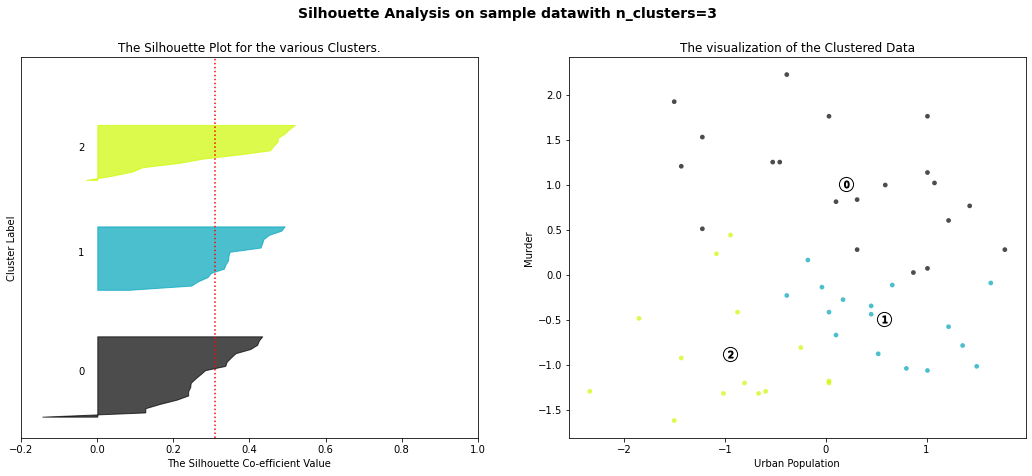

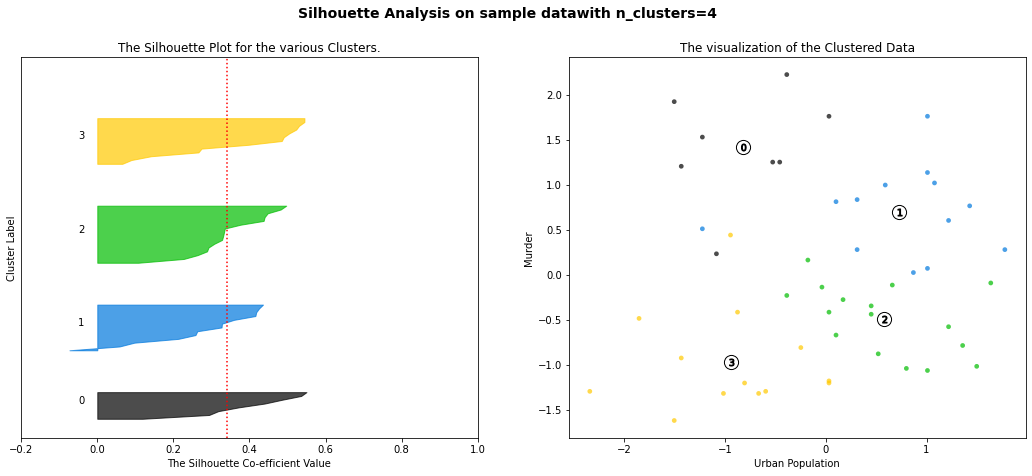

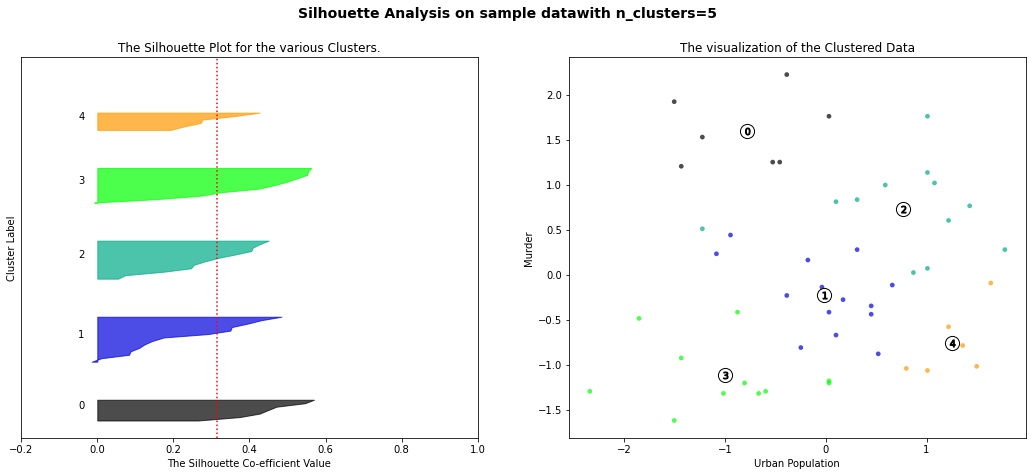

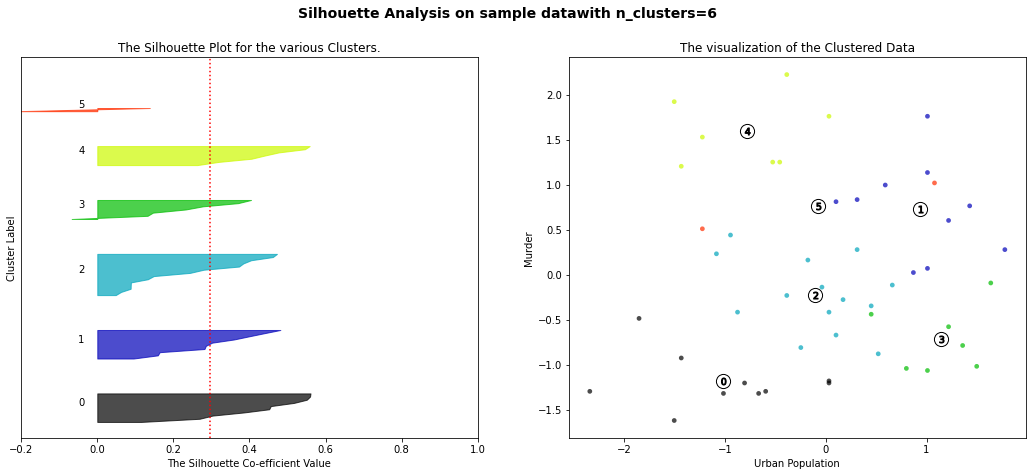

In [ ]:
for n_clusters in range_n_clusters:
  fig,(ax1,ax2)=plt.subplots(1,2)
  fig.set_size_inches(18,7)



  ax1.set_xlim([-0.1,1]) 
  ax1.set_ylim([0,len(X)+(n_clusters+1)*10])

  clustered=KMeans(n_clusters=n_clusters,random_state=10,init='k-means++')
  clustered_labels=clustered.fit_predict(X)

  silhouette_avg=silhouette_score(X,clustered_labels)
  print("For n_clusters=",n_clusters,"The average Silhouette_score is :",silhouette_avg)

  sample_silhouette_values=silhouette_samples(X,clustered_labels)

  y_lower=5
  
  for i in range(n_clusters):
    ith_cluster_silhouette_values=\
    sample_silhouette_values[clustered_labels==i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i=ith_cluster_silhouette_values.shape[0]
    y_upper=y_lower+size_cluster_i

    color=cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)

    ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))

    y_lower=y_upper+10

  ax1.set_title("The Silhouette Plot for the various Clusters.")
  ax1.set_xlabel("The Silhouette Co-efficient Value")
  ax1.set_ylabel("Cluster Label")

  ax1.axvline(x=silhouette_avg,color='red',linestyle=":")

  ax1.set_yticks([])
  ax1.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])


  colors=cm.nipy_spectral(clustered_labels.astype(float)/n_clusters)

  ax2.scatter(X[:,2],X[:,0],marker='.',s=90,lw=0,alpha=0.7,color=colors,edgecolor='k') # Here Our Features/Columns are Urban Population and Rape.

  centers=clustered.cluster_centers_
  
  ax2.scatter(centers[:,2],centers[:,0],marker='o',c='white',alpha=1,s=200,edgecolor='k')

  for i,c in enumerate(centers):
    ax2.scatter(c[2],c[0],marker='$%d$'%i,alpha=1,s=50,edgecolor='k')

  ax2.set_title("The visualization of the Clustered Data")
  ax2.set_xlabel("Urban Population")
  ax2.set_ylabel("Murder")
  
  plt.suptitle(("Silhouette Analysis on sample data" "with n_clusters=%d")% n_clusters,fontsize=14,fontweight='bold')
plt.show()

## **Using Heat-Map to find the Silhouette Score.**

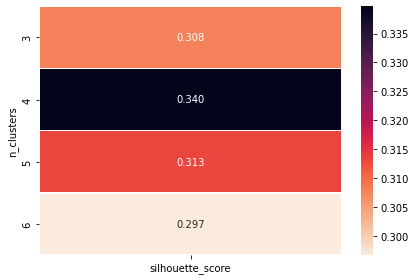

In [ ]:
# Plotting Heat-Map for Silhouette Score

results=[]

for n_clusters in range_n_clusters:
  clustered=KMeans(n_clusters=n_clusters,init='k-means++',random_state=10)
  clustered_labels=clustered.fit_predict(X)
  silhouette_avg=silhouette_score(X,clustered_labels)
  results.append([n_clusters,silhouette_avg])

results=pd.DataFrame(results,columns=["n_clusters","silhouette_score"])
pivot_km=pd.pivot_table(results,index="n_clusters",values="silhouette_score")

plt.figure()
sns.heatmap(pivot_km,annot=True,linewidths=0.5,fmt='0.3f',cmap=sns.cm.rocket_r)
plt.tight_layout()